# Kernel Support Vector Machines
Apply 4-fold cross-validation to the provided training data subset to train your classifiers and
identify their optimal parameters. In addition to the classifier’s parameters (e.g. regularization,
kernel, Number of layers/nodes, learning rate, etc.), you should also consider the following 4 ways
to preprocess and rescale the data:
- No preprocessing
- StandardScaler
- RobustScaler
- MinMaxScaler

import libraries

In [2]:


from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

!pip install numpy scipy scikit-learn matplotlib pandas


import mglearn as mglearn

!pip install numpy scipy scikit-learn matplotlib pandas
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


setup data

general methods

In [3]:
def shape_params_linear_kernel(c_values):
    hyper_params = dict(C=c_values)
    return hyper_params


def shape_params_polynomial_kernel(c_values, d_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['degree'] = d_values
    return hyper_params


def shape_params_radial_kernel(c_values, gamma_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['gamma'] = gamma_values
    return hyper_params


def run_grid_svm(kernel, hyper_parameters, X_data):
    classifier = SVC(
        kernel=kernel,
        random_state=0
    )
    grid_search = GridSearchCV(
        classifier,
        hyper_parameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_data, y_train)

    print_grid_search_results(grid_search, hyper_parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train score: ", grid_search.cv_results_['mean_train_score'])
    print("Test score: ", grid_search.cv_results_['mean_test_score'])


def preprocess_data(X_scaled):
    pca = PCA(n_components=2)
    pca.fit(X_scaled)

    return pca.fit_transform(X_scaled)


def display_preprocessed_2d(pca_data):
    plt.figure(figsize=(32, 32))
    mglearn.discrete_scatter(pca_data[:, 0], pca_data[:, 1], y_train)
    plt.legend(
        [
            '0: T-shirt/top',
            '1: Trouser',
            '2: Pullover',
            '3: Dress',
            '4: Coat,',
        ],
        loc="best"
    )
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")


def scale(scaler, X_data):
    return scaler.fit(X_data).transform(X_data)


In [4]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)
# X_test_standard = fit_and_scale(StandardScaler(), X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# X_train_robust = fit_and_scale(RobustScaler(), X_train)
# X_test_robust = fit_and_scale(RobustScaler(), X_test)
scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# X_train_minmax = fit_and_scale(MinMaxScaler(), X_train)
# X_test_minmax = fit_and_scale(MinMaxScaler(), X_test)

In [4]:
# scaler_standard = StandardScaler()
# scaler_standard.fit(X_train)
# X_train_scaled_standard = scaler_standard.transform(X_train)
#
# svm = SVC(C=1, kernel='linear')
# svm.fit(X_train, y_train)
# %time print('Accuracy test: ', svm.score(X_test, y_test))

## Kernel Selection
vary only the C values to point in the direction of the best kernel up front

### C-only GridSearch on linear

In [5]:
# %time grid_results_svm_linear = run_grid_svm( 'linear', shape_params_linear_kernel(np.linspace(0,100,2)) )

PCA Eigen

## Standard Scaler

PCA vanilla

In [6]:
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_standard, y_train)
%time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.8738738738738738
CPU times: user 11.7 ms, sys: 306 µs, total: 12 ms
Wall time: 12.2 ms


Text(0, 0.5, 'Second principal component')

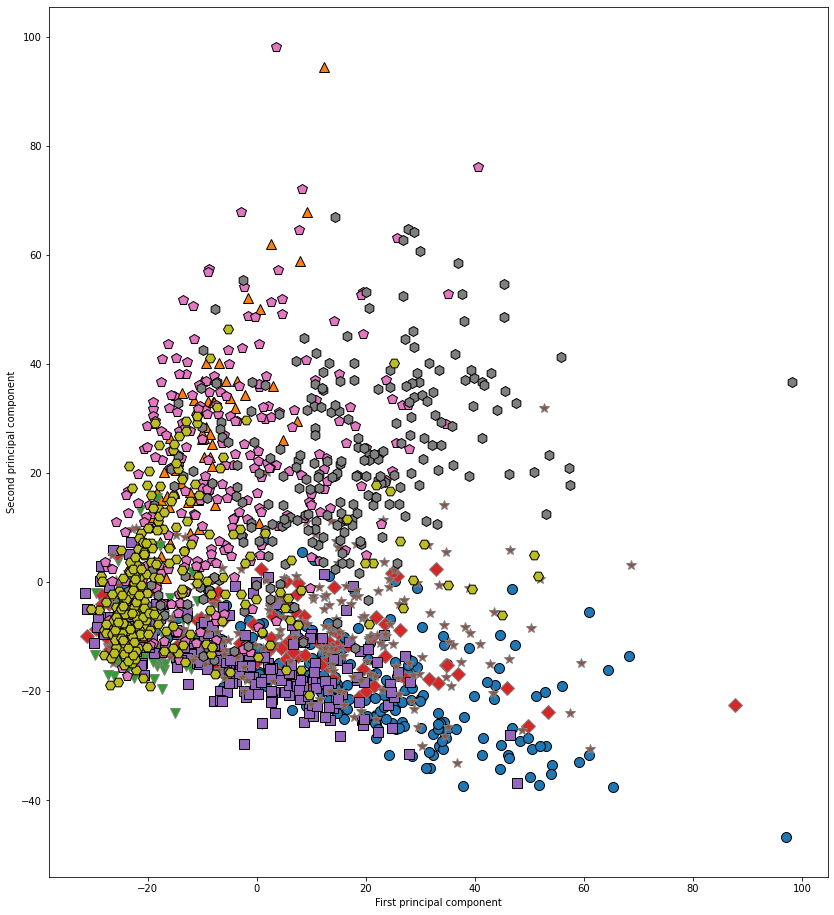

In [7]:
from sklearn.decomposition import PCA

pca_standard = PCA(n_components=2)
pca_standard.fit(X_train)

X_train_pca_scaler = pca_standard.fit_transform(X_train)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(16, 16))
mglearn.discrete_scatter(X_train_pca_scaler[:, 0], X_train_pca_scaler[:, 1], y_train)
# plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


PCA with standard

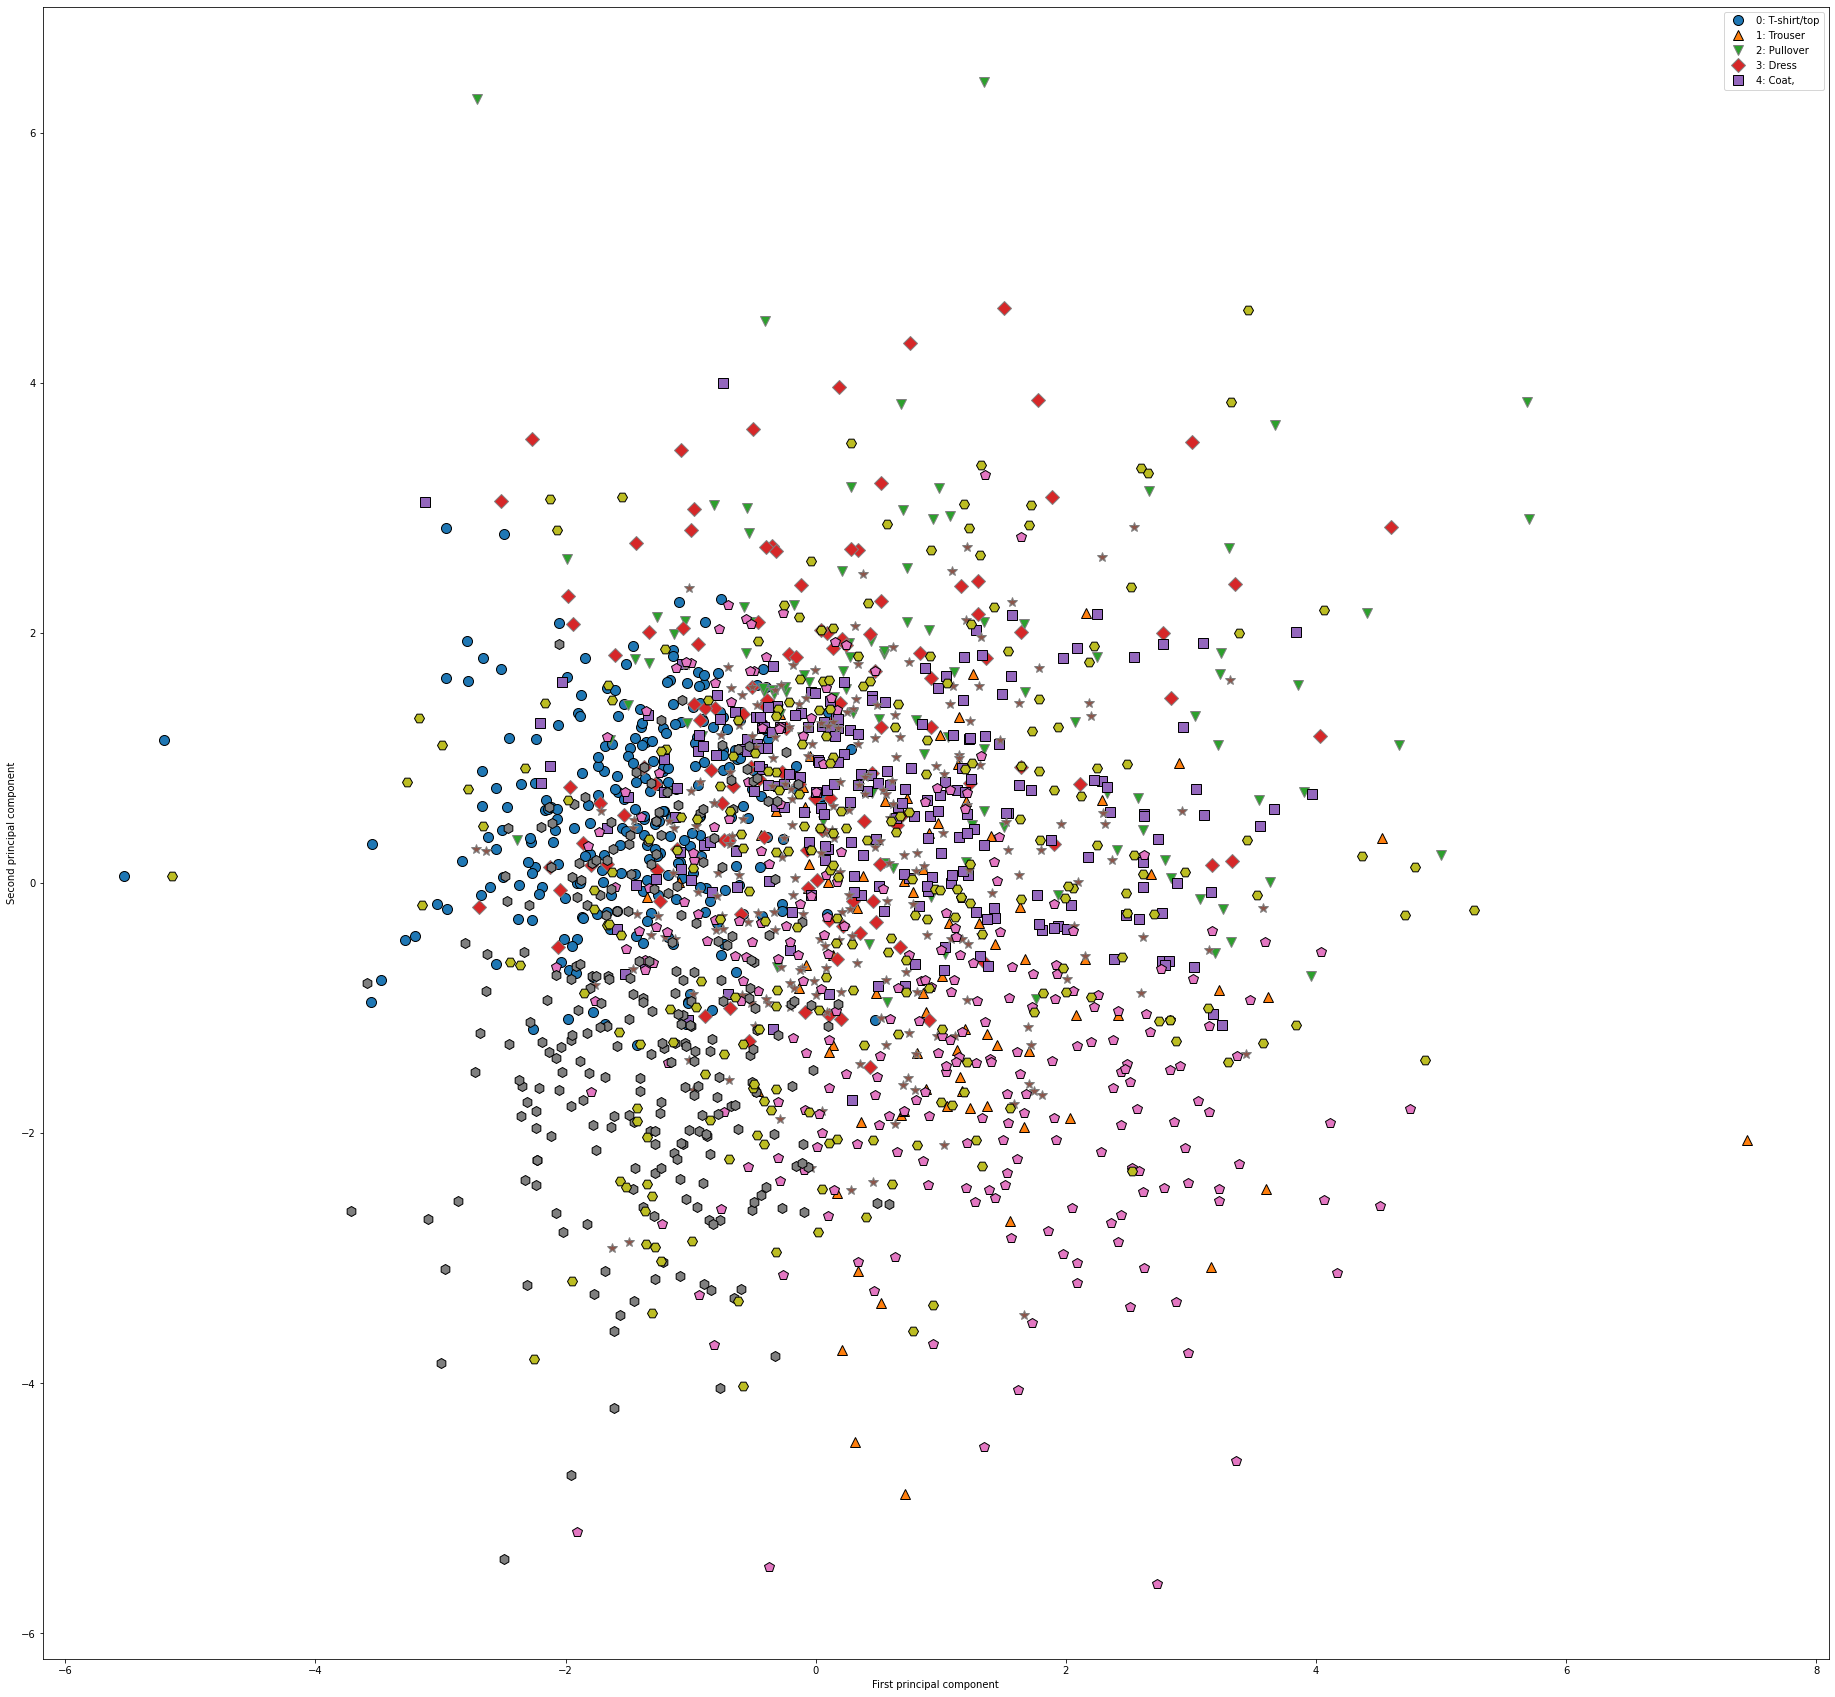

In [8]:
X_pca_standard = preprocess_data(
    scale(StandardScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [10]:
X_train_standard = scale(StandardScaler(), X_train)
X_test_standard = scale(StandardScaler(), X_test)
svm = SVC(C=1, kernel='poly')
svm.fit(X_train_standard, y_train)
%time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.6869369369369369
CPU times: user 25.9 ms, sys: 106 µs, total: 26 ms
Wall time: 26.2 ms


## Robust Scaler

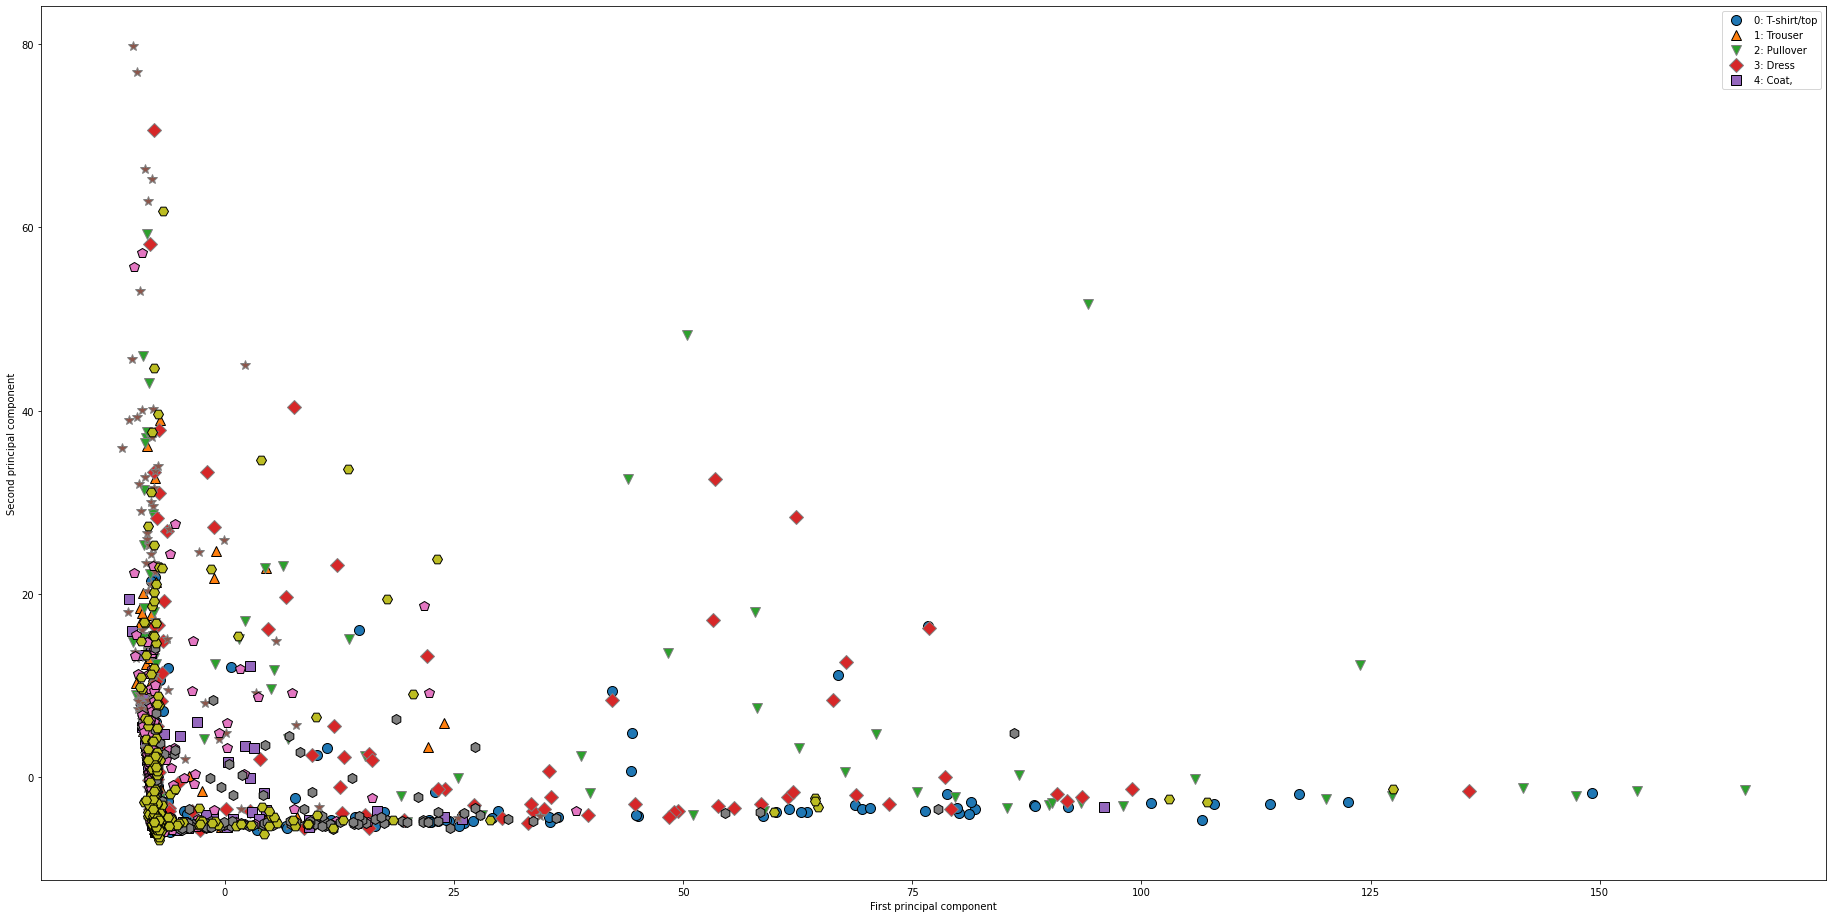

In [11]:
X_pca_standard = preprocess_data(
    scale(RobustScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [13]:
X_train_standard = scale(RobustScaler(), X_train)
X_test_standard = scale(RobustScaler(), X_test)
svm = SVC(C=1, kernel='rbf')
svm.fit(X_train_standard, y_train)
%time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.6103603603603603
CPU times: user 128 ms, sys: 1.11 ms, total: 129 ms
Wall time: 130 ms


## MinMax Scaler

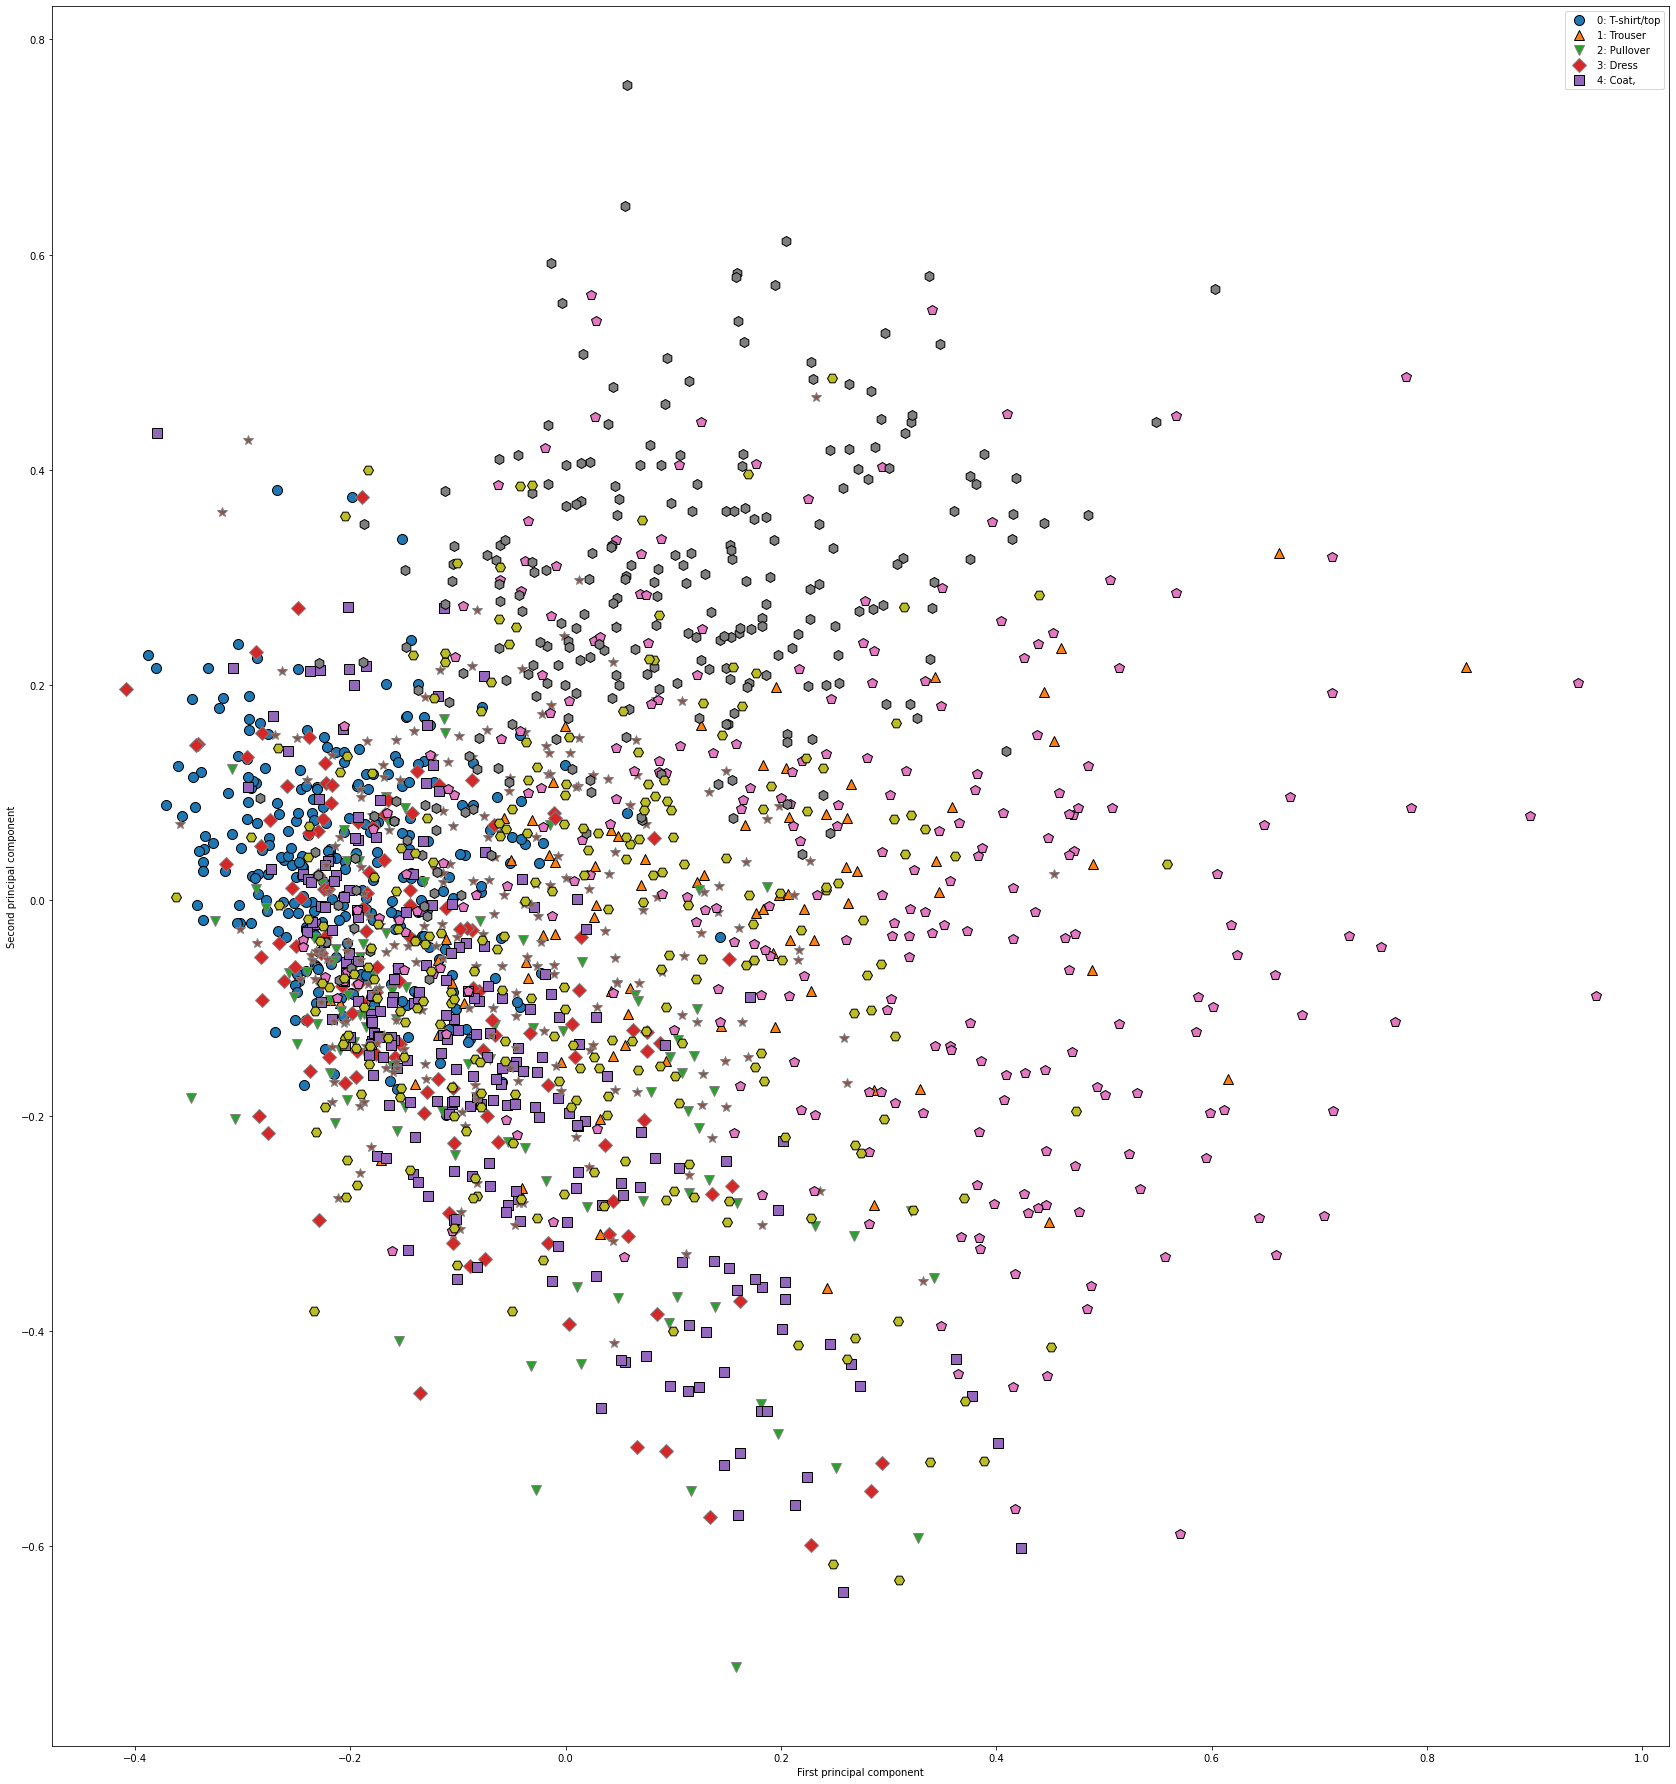

In [14]:
X_pca_standard = preprocess_data(
    scale(MinMaxScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [16]:
X_train_standard = scale(MinMaxScaler(), X_train)
X_test_standard = scale(MinMaxScaler(), X_test)
svm = SVC(C=1, kernel='poly')
svm.fit(X_train_standard, y_train)
% time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.8755751150230046
CPU times: user 7.34 s, sys: 53.1 ms, total: 7.39 s
Wall time: 7.48 s


# Cross Validation

## Linear
linear and standard

In [15]:
grid_results_linear_standard = run_grid_svm(
    'linear',
    shape_params_linear_kernel([1, 5, 10, 25]),
    X_train_standard
)

Best C: 1
Train score:  [0.98516365 0.99023432 0.99042215 0.99136129]
Test score:  [0.83662274 0.82198056 0.82085697 0.81690791]


In [ ]:
print(grid_results_linear_standard.cv_results_)

linear and robust

In [16]:
grid_results_linear_robust = run_grid_svm(
    'linear',
    shape_params_linear_kernel([0.1, 1, 10, 100]),
    X_train_robust
)

Best C: 0.1
Train score:  [0.96582124 0.98516365 0.99042215 0.99192464]
Test score:  [0.85858601 0.83662274 0.82085697 0.81634357]


linear and minmax

In [18]:
grid_results_linear_minmax = run_grid_svm(
    'linear',
    shape_params_linear_kernel([0.1, 1, 10, 100]),
    X_train_minmax
)
# svm = SVC(C=1, kernel='linear')
# svm.fit(X_train_standard, y_train)
# %time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Best C: 10
Train score:  [0.73784162 0.91924861 0.96394295 0.98309796]
Test score:  [0.7262001  0.89859272 0.90253544 0.88394037]


## Poly
poly and standard

In [19]:
grid_results_poly_standard = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_standard
)

Best C: 25
Best degree: 1
Train score:  [0.76694717 0.61746443 0.47643413 0.88469419 0.76957663 0.64206491
 0.91192399 0.83173679 0.7068527  0.93896639 0.8923939  0.75361514]
Test score:  [0.73014281 0.53803281 0.36957782 0.82422137 0.63549483 0.50930134
 0.846191   0.68732079 0.54592586 0.85576561 0.71604717 0.56563816]


poly and robust

In [21]:
grid_results_poly_robust = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_robust
)

Best C: 25
Best degree: 1
Train score:  [0.76694717 0.61746443 0.47643413 0.88469419 0.76957663 0.64206491
 0.91192399 0.83173679 0.7068527  0.93896639 0.8923939  0.75361514]
Test score:  [0.73014281 0.53803281 0.36957782 0.82422137 0.63549483 0.50930134
 0.846191   0.68732079 0.54592586 0.85576561 0.71604717 0.56563816]


poly and minmax

In [20]:
grid_results_poly_minmax = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_minmax
)

Best C: 1
Best degree: 1
Train score:  [0.93183101 0.91605665 0.87023533 0.96075029 0.95229912 0.91643047
 0.96863797 0.96751113 0.93239182 0.97727668 0.98065675 0.9372765 ]
Test score:  [0.90535202 0.86929438 0.80507723 0.90310104 0.88057216 0.82649523
 0.89690608 0.8788817  0.83832718 0.88675823 0.88732511 0.82424171]


## RBF
rbf and standard

In [22]:
grid_results_rbf_standard = run_grid_svm(
    'rbf',
    shape_params_radial_kernel([1, 25, 50], [.1, 1, 10]),
    X_train_standard
)

Best C: 25
Best gamma: 0.1
Train score:  [0.99117374 0.99323944 0.99380292 0.99380292 0.99380292 0.99380292
 0.99380292 0.99380292 0.99380292]
Test score:  [0.21351275 0.14816947 0.14929687 0.22477783 0.1492956  0.14929687
 0.22477783 0.1492956  0.14929687]


rbf and robust

In [1]:
# skip because accuracy terrible
print('hwa')

hwa


robust and minmax

In [6]:
grid_results_rbf_minmax = run_grid_svm(
    'rbf',
    shape_params_radial_kernel([1, 25, 50], [1, 100, 1000]),
    X_train_minmax
)

Best C: 25
Best gamma: 1
Train score:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test score:  [0.33223217 0.27073553 0.20002001 0.35463465 0.27073553 0.20002001
 0.35463465 0.27073553 0.20002001]


In [6]:
svm = SVC(C=10, degree=3, kernel='poly')
svm.fit(X_train_minmax, y_train)
% time print('Accuracy test: ', svm.score(X_test_minmax, y_test))

Accuracy test:  0.8831766353270654
CPU times: user 4.98 s, sys: 30 ms, total: 5.01 s
Wall time: 5.03 s
